<a href="https://colab.research.google.com/github/preciousNliwasa/Conv2-Net/blob/main/convolution_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [158]:
from tensorflow import keras 
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import layers,regularizers

In [159]:
import warnings

In [160]:
warnings.filterwarnings('ignore')

In [161]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [162]:
x_train.shape

(50000, 32, 32, 3)

In [163]:
y_train.shape

(50000, 1)

In [164]:
x_test.shape

(10000, 32, 32, 3)

In [165]:
y_train.shape

(50000, 1)

In [166]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [167]:
model = keras.Sequential()

In [168]:
# building a convolutional network

In [169]:
model.add(keras.Input(shape = (32,32,3)))
model.add(layers.Conv2D(32,3,activation = 'relu',padding = 'same'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(64,3,activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(128,3,activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation = 'softmax'))

In [170]:
model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [171]:
import matplotlib.pyplot as plt

In [172]:
## training 

In [173]:
history = model.fit(x_train,y_train,epochs = 5,batch_size=64,verbose=2,validation_split=0.2)

Epoch 1/5
625/625 - 64s - loss: 1.5969 - accuracy: 0.4184 - val_loss: 1.3293 - val_accuracy: 0.5305
Epoch 2/5
625/625 - 63s - loss: 1.1974 - accuracy: 0.5756 - val_loss: 1.1136 - val_accuracy: 0.6078
Epoch 3/5
625/625 - 63s - loss: 1.0275 - accuracy: 0.6372 - val_loss: 1.0084 - val_accuracy: 0.6508
Epoch 4/5
625/625 - 63s - loss: 0.9151 - accuracy: 0.6806 - val_loss: 0.9332 - val_accuracy: 0.6744
Epoch 5/5
625/625 - 63s - loss: 0.8193 - accuracy: 0.7129 - val_loss: 0.9354 - val_accuracy: 0.6720


In [174]:
history.history

{'accuracy': [0.4183500111103058,
  0.5756499767303467,
  0.6372249722480774,
  0.6805999875068665,
  0.7129250168800354],
 'loss': [1.5968555212020874,
  1.1974290609359741,
  1.0275294780731201,
  0.9151226282119751,
  0.8192815184593201],
 'val_accuracy': [0.5304999947547913,
  0.6078000068664551,
  0.6507999897003174,
  0.6743999719619751,
  0.671999990940094],
 'val_loss': [1.329270362854004,
  1.1135880947113037,
  1.0084339380264282,
  0.9331643581390381,
  0.935431718826294]}

In [175]:
plt.style.use('seaborn-darkgrid')

In [176]:
## evaluating

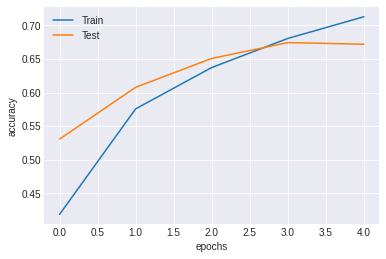

In [177]:
plt.plot(history.history['accuracy'],label = 'Train')
plt.plot(history.history['val_accuracy'],label = 'Test')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()


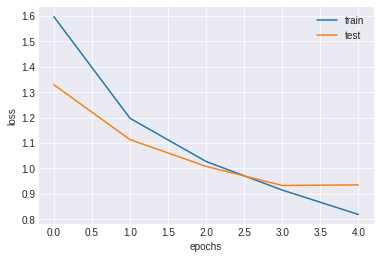

In [178]:
plt.plot(history.history['loss'],label = 'train')
plt.plot(history.history['val_loss'],label = 'test')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [179]:
from google.colab import files

In [180]:
y_pred = model.predict_classes(x_test)

In [181]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [182]:
accuracy_score(y_test,y_pred)

0.6676

In [183]:
conf = confusion_matrix(y_test,y_pred)

In [184]:
import seaborn as sns

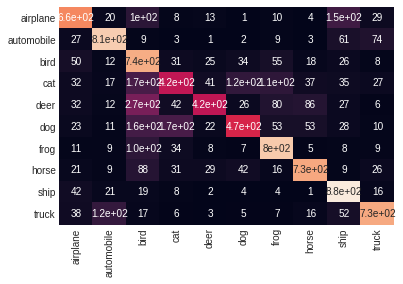

In [185]:
sns.heatmap(conf,cbar=False,xticklabels= ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck'],yticklabels=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck'],annot = True)
plt.show()

In [186]:
## predicting using an external object(a bird)

In [187]:
img = files.upload()

Saving birdtensor.jpg to birdtensor (1).jpg


In [188]:
iim = plt.imread('birdtensor.jpg')

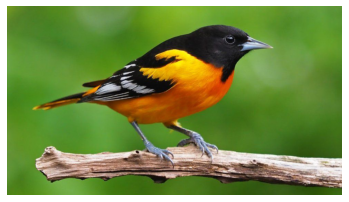

In [189]:
plt.imshow(iim)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.show()

In [190]:
from skimage.transform import resize

In [191]:
iim2 = resize(iim,(32,32,3))

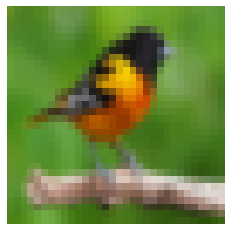

In [192]:
plt.imshow(iim2)
plt.xticks([])
plt.yticks([])
plt.show()

In [193]:
import numpy as np
import pandas as pd

In [194]:
model.predict_proba(np.array([iim2,]))

array([[1.5993740e-02, 5.1866018e-04, 9.6289307e-01, 9.7404351e-04,
        1.8759457e-03, 1.2890875e-03, 1.0534790e-02, 5.2091517e-03,
        4.3976179e-04, 2.7167739e-04]], dtype=float32)

In [195]:
def predict_category(iim2):
  dc = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
  pred = model.predict_proba(np.array([iim2,]))
  df = pd.DataFrame(pred,columns = dc)

  return df

In [196]:
predict_category(iim2)

,airplane,automobile,bird,cat,deer,dog,frog,horse,ship,truck
0,0.015994,0.000519,0.962893,0.000974,0.001876,0.001289,0.010535,0.005209,0.00044,0.000272
